In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
%matplotlib inline 

In [2]:
titanic_data = pd.read_csv('datasets/titanic_train.csv')

In [3]:
titanic_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#titanic_data['Age'].mean()

In [6]:
titanic_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

<Axes: >

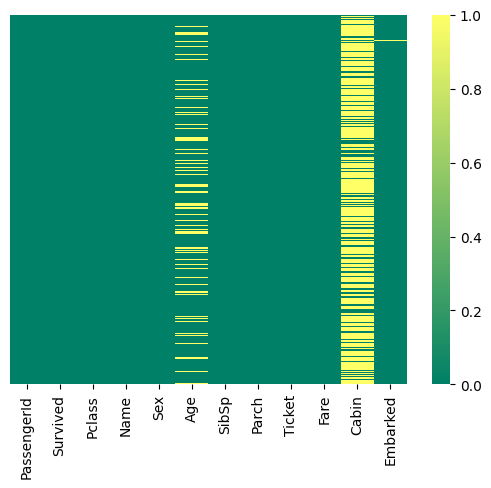

In [7]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=True, cmap='summer')

/tmp/ipykernel_81595/751345813.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=titanic_data, palette='RdBu_r');


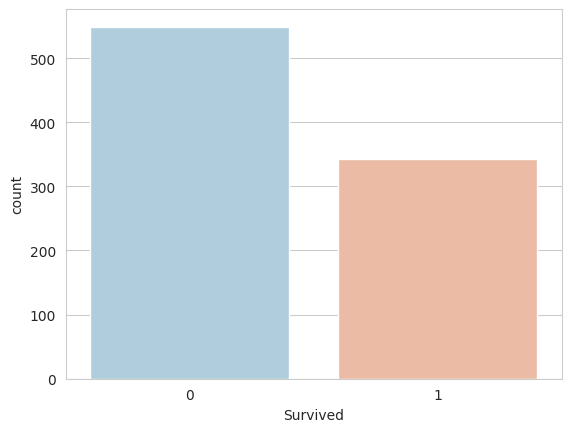

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=titanic_data, palette='RdBu_r');

/tmp/ipykernel_81595/751345813.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=titanic_data, palette='RdBu_r');


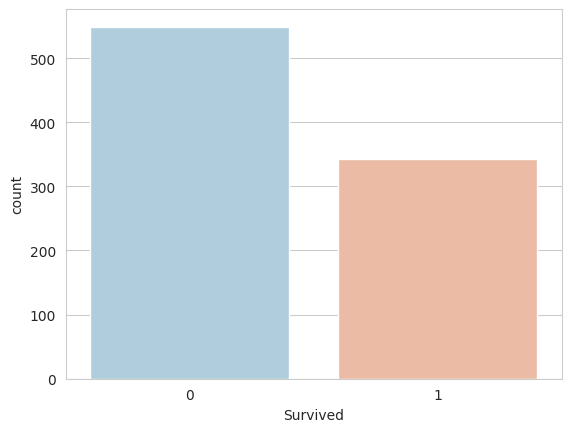

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=titanic_data, palette='RdBu_r');

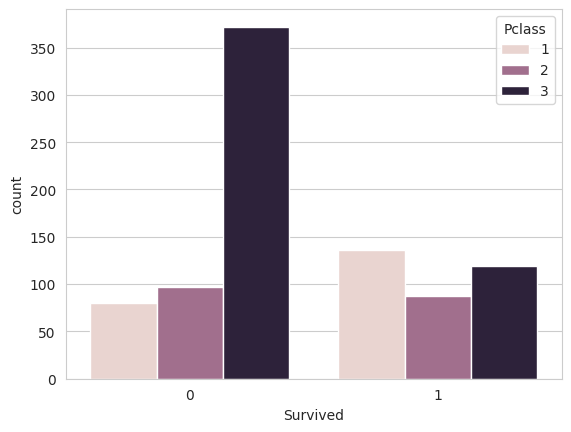

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=titanic_data, hue='Pclass');

<Axes: xlabel='Age', ylabel='Count'>

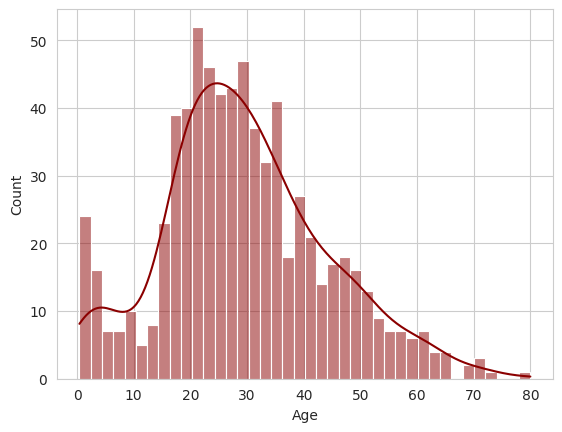

In [11]:
sns.histplot(titanic_data['Age'].dropna(), kde=True, bins=40, color = 'darkred')

In [12]:
titanic_data['Age'].dropna().mean()

29.69911764705882

In [13]:
avg_age_per_class = titanic_data.groupby('Pclass')[['Age']].mean()

In [14]:
avg_age_per_class

Age
Pclass           
1       38.233441
2       29.877630
3       25.140620

In [15]:
type(avg_age_per_class)

pandas.core.frame.DataFrame

In [16]:
avg_age_per_class['Age'][1]

38.233440860215055

In [17]:
def impute_age(cols):

    age = cols[0]
    pclass = cols[1]

    if pd.isnull(age):
        if pclass == 1: 
            return int(avg_age_per_class['Age'][1])
        elif pclass == 2:
            return int(avg_age_per_class['Age'][2])
        else:
            return int(avg_age_per_class['Age'][3])
    else:
        return age 
            

In [18]:
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(impute_age, axis = 1)

<Axes: >

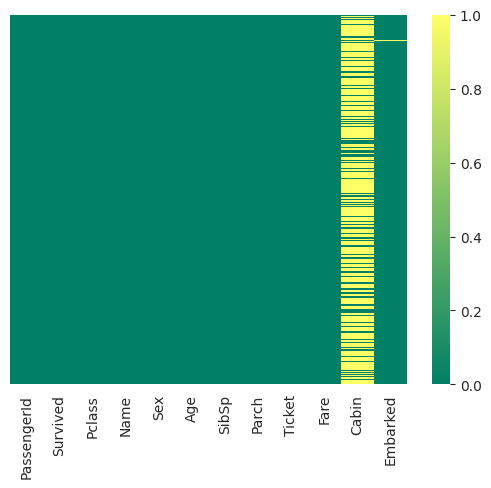

In [19]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=True, cmap='summer')

In [20]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
titanic_data.drop('Cabin', axis=1, inplace=True)

<Axes: >

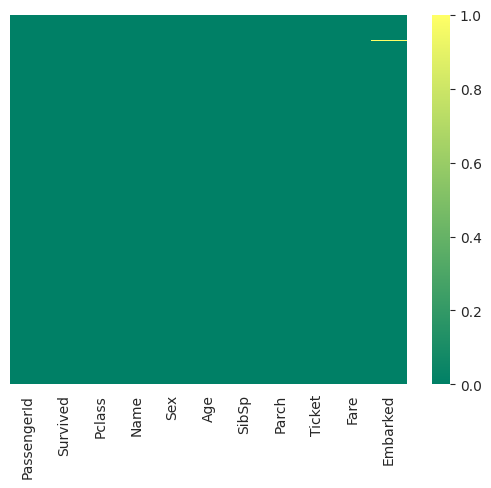

In [22]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=True, cmap='summer')

In [23]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [24]:
titanic_data = titanic_data.dropna()

In [25]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [26]:
titanic_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [27]:
sex = pd.get_dummies(titanic_data['Sex'], drop_first=True).astype(int)

In [28]:
sex.head()

male
0     1
1     0
2     0
3     0
4     1

In [29]:
embark = pd.get_dummies(titanic_data['Embarked'], drop_first=True).astype(int)

In [30]:
embark.head()

Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1

In [31]:
titanic_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [32]:
titanic_data.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [33]:
titanic_data = pd.concat([titanic_data, sex, embark], axis =1)

In [34]:
titanic_data.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1

In [35]:
y = titanic_data['Survived']

In [36]:
X = titanic_data.drop('Survived', axis=1)

In [37]:
X.head()

PassengerId  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1       3  22.0      1      0   7.2500     1  0  1
1            2       1  38.0      1      0  71.2833     0  0  0
2            3       3  26.0      0      0   7.9250     0  0  1
3            4       1  35.0      1      0  53.1000     0  0  1
4            5       3  35.0      0      0   8.0500     1  0  1

In [38]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

In [41]:
X_train.head()

PassengerId  Pclass   Age  SibSp  Parch    Fare  male  Q  S
807          808       3  18.0      0      0   7.775     0  0  1
651          652       2  18.0      0      1  23.000     0  0  1
2              3       3  26.0      0      0   7.925     0  0  1
690          691       1  31.0      1      0  57.000     1  0  1
196          197       3  25.0      0      0   7.750     1  1  0

In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 622 entries, 807 to 865
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  622 non-null    int64  
 1   Pclass       622 non-null    int64  
 2   Age          622 non-null    float64
 3   SibSp        622 non-null    int64  
 4   Parch        622 non-null    int64  
 5   Fare         622 non-null    float64
 6   male         622 non-null    int64  
 7   Q            622 non-null    int64  
 8   S            622 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 48.6 KB


In [43]:
from sklearn.linear_model import LogisticRegression

In [49]:
# Instantiate the model
model = LogisticRegression(max_iter=1000)

In [50]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [51]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267 entries, 511 to 634
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  267 non-null    int64  
 1   Pclass       267 non-null    int64  
 2   Age          267 non-null    float64
 3   SibSp        267 non-null    int64  
 4   Parch        267 non-null    int64  
 5   Fare         267 non-null    float64
 6   male         267 non-null    int64  
 7   Q            267 non-null    int64  
 8   S            267 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 20.9 KB


In [52]:
predictions = model.predict(X_test)

In [53]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

In [54]:
from sklearn.metrics import confusion_matrix, classification_report

In [55]:
print(confusion_matrix(predictions, y_test))

[[149  33]
 [ 14  71]]


In [56]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       182
           1       0.68      0.84      0.75        85

    accuracy                           0.82       267
   macro avg       0.80      0.83      0.81       267
weighted avg       0.84      0.82      0.83       267

